## Import packages and check working directory

In [1]:
import os
os.getcwd()

'C:\\Users\\amona\\Desktop\\Dissertation'

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Import and check csv

In [3]:
data = pd.read_csv("OSA_complete_patients.csv", index_col = 0)

In [4]:
data.head()

,PatientID,Sex,Age,Current_smoker,Former_smoker,Sedentary,Height,Weight,Cervical_perimeter,Abdominal_perimeter,...,Nocturnal_perspiration,Shortness_of_breath_on_exertion,Nocturia,Drowsiness_accident,Near_miss_accident,Respiratory_arrest,Epworth_scale,Pichots_scale,Depression_scale,Severity
39,23,2.0,57.883641,0.0,0.0,0.0,172.0,90.0,45.0,125.0,...,0.0,0.0,1.0,0.0,0.0,0.0,3.0,4.0,5.0,3
41,24,2.0,60.796715,0.0,0.0,0.0,156.0,85.0,35.0,113.0,...,0.0,1.0,1.0,0.0,0.0,1.0,19.0,17.0,4.0,3
46,28,1.0,63.438741,0.0,0.0,0.0,178.0,68.0,35.0,73.0,...,0.0,0.0,1.0,0.0,0.0,1.0,5.0,3.0,0.0,1
55,32,1.0,28.736482,0.0,0.0,0.0,180.0,69.0,36.0,83.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0
56,33,1.0,56.802190,0.0,0.0,0.0,185.0,118.0,43.0,106.0,...,0.0,0.0,0.0,0.0,0.0,1.0,12.0,13.0,2.0,3


In [5]:
data.shape

(21818, 51)

## Stratified train-test-split

In [6]:
features = ['Sex', 'Age', 'Current_smoker', 'Former_smoker',
       'Sedentary', 'Height', 'Weight', 'Cervical_perimeter',
       'Abdominal_perimeter', 'Systolic_BP', 'Diastolic_BP',
       'Maxillofacial_profile', 'BMI', 'High_BP', 'Asthma', 'Rhinitis', 'COPD',
       'Respiratory_fail', 'Myocardial_infarct', 'Coronary_fail',
       'Arrhythmias', 'Stroke', 'Heart_fail', 'Arteriopathy', 'Gastric_reflux',
       'Glaucoma', 'Diabetes', 'Hypercholesterolemia', 'Hypertriglyceridemia',
       'Hypo(er)thyroidism', 'Depression', 'Obesity', 'Dysmorphology',
       'Restless_Leg_Syndrome', 'Snoring', 'Diurnal_somnolence',
       'Driving_drowsiness', 'Morning_fatigue', 'Morning_headache',
       'Memory_problem', 'Nocturnal_perspiration',
       'Shortness_of_breath_on_exertion', 'Nocturia', 'Drowsiness_accident',
       'Near_miss_accident', 'Respiratory_arrest', 'Epworth_scale',
       'Pichots_scale', 'Depression_scale']
X=data[features]  # Features  
y=data['Severity']  # Labels

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.2,
                                                    random_state=0)

In [8]:
print('\nClass distribution train (%):')
y_train.value_counts(normalize=True) * 100


Class distribution train (%):


3    40.231466
2    23.564799
1    23.083534
0    13.120202
Name: Severity, dtype: float64

In [9]:
print('\nClass distribution test (%):')
y_test.value_counts(normalize=True) * 100


Class distribution test (%):


3    40.238313
2    23.579285
1    23.075160
0    13.107241
Name: Severity, dtype: float64

#### A note: a comparison of boosting algorithms with RF and SVM can be found in 'Towards Validating the Effectiveness of Obstructive Sleep Apnea Classification from Electronic Health Records Using Machine Learning (Ramesh et al. 2021)​'

## Random Forest classifier

In [10]:
clf=RandomForestClassifier(n_estimators=100, class_weight='balanced')  #defining classifier method

clf.fit(X_train,y_train)                   # training classifier

y_pred=clf.predict(X_test)                  # testing classifier 

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4605866177818515


### 5-fold crossvalidation

In [11]:
from sklearn.model_selection import cross_val_score
cross_val = cross_val_score(clf, X, y, cv=5)
cross_val

array([0.45142071, 0.45210816, 0.46127406, 0.46917259, 0.46344259])

In [12]:
print("%0.4f accuracy with a standard deviation of %0.4f" % (cross_val.mean(), cross_val.std()))

0.4595 accuracy with a standard deviation of 0.0068


### Classification report

In [13]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.46      0.23      0.31       572
           1       0.35      0.32      0.34      1007
           2       0.30      0.13      0.18      1029
           3       0.53      0.81      0.64      1756

    accuracy                           0.46      4364
   macro avg       0.41      0.37      0.37      4364
weighted avg       0.42      0.46      0.42      4364



### Balanced accuracy

In [14]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, y_pred)

0.37336092575421986

### G-mean

In [15]:
from imblearn.metrics import geometric_mean_score
geometric_mean_score(y_test, y_pred)

0.297895453332638

### Confusion matrix

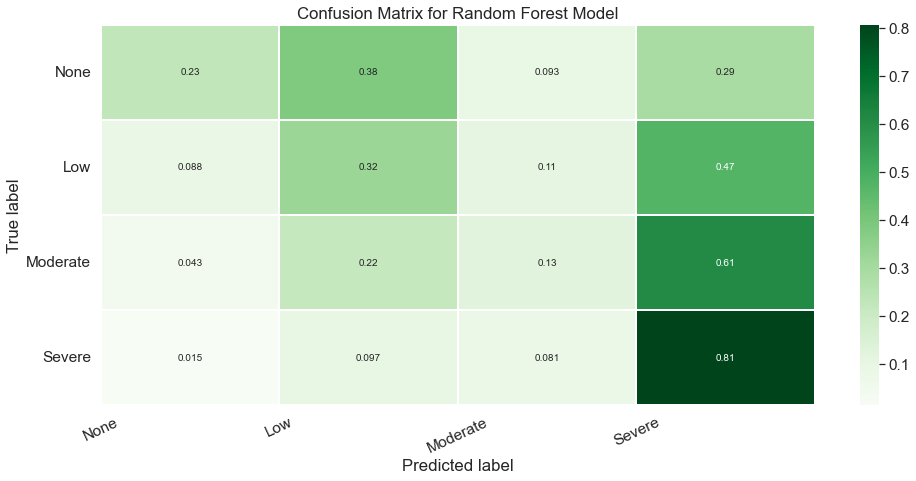

In [16]:
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['None', 'Low', 'Moderate', 
               'Severe']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

## Extra Trees Classifier

In [17]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=100)
clf.fit(X_train,y_train)                   # training classifier

y_pred=clf.predict(X_test)                  # testing classifier 

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4576076993583868


### 5-fold cross validation

In [18]:
cross_val = cross_val_score(clf, X, y, cv=5)
print("%0.4f accuracy with a standard deviation of %0.4f" % (cross_val.mean(), cross_val.std()))

0.4504 accuracy with a standard deviation of 0.0059


### Classification report

In [19]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.45      0.23      0.31       572
           1       0.33      0.31      0.32      1007
           2       0.30      0.15      0.20      1029
           3       0.53      0.80      0.64      1756

    accuracy                           0.46      4364
   macro avg       0.40      0.37      0.37      4364
weighted avg       0.42      0.46      0.42      4364



### Balanced accuracy

In [20]:
balanced_accuracy_score(y_test, y_pred)

0.371509864826868

### G-mean

In [21]:
geometric_mean_score(y_test, y_pred)

0.3031771865302295

### Confusion matrix

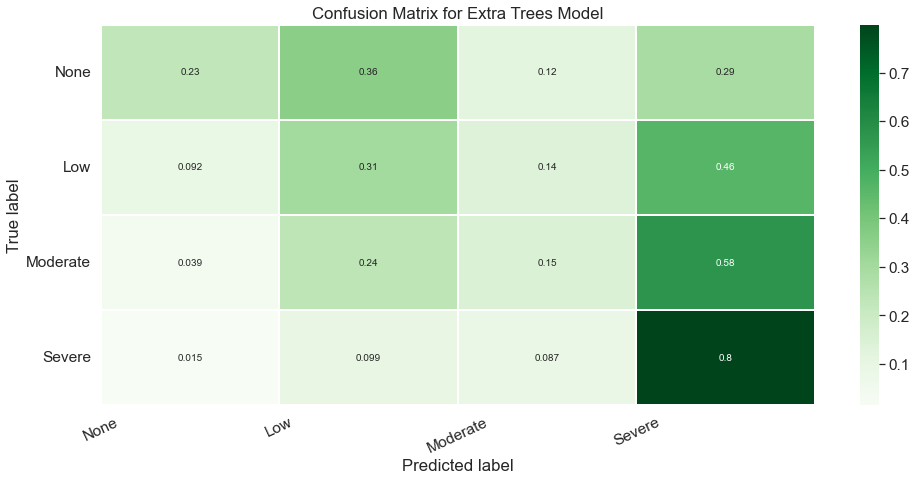

In [22]:
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['None', 'Low', 'Moderate', 
               'Severe']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Extra Trees Model')
plt.show()

## XGBoost Classifier

In [23]:
import xgboost as xgb
clf = xgb.XGBClassifier(n_estimators = 100)
clf.fit(X_train,y_train)                   # training classifier

y_pred=clf.predict(X_test)                  # testing classifier 

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.45348304307974335


### 5-fold cross validation

In [24]:
cross_val = cross_val_score(clf, X, y, cv=5)
print("%0.4f accuracy with a standard deviation of %0.4f" % (cross_val.mean(), cross_val.std()))

0.4537 accuracy with a standard deviation of 0.0056


### Classification report

In [25]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.40      0.26      0.31       572
           1       0.32      0.31      0.31      1007
           2       0.33      0.19      0.24      1029
           3       0.55      0.75      0.63      1756

    accuracy                           0.45      4364
   macro avg       0.40      0.38      0.38      4364
weighted avg       0.42      0.45      0.43      4364



### Balanced accuracy

In [26]:
balanced_accuracy_score(y_test, y_pred)

0.3776116458095302

### G-mean

In [27]:
geometric_mean_score(y_test, y_pred)

0.32731505593546584

### Confusion matrix

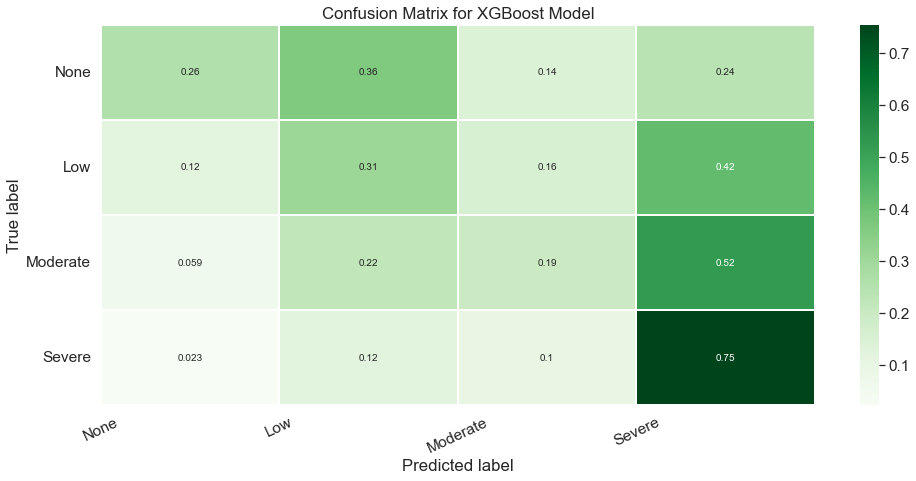

In [28]:
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['None', 'Low', 'Moderate', 
               'Severe']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for XGBoost Model')
plt.show()

## LightGBM Classifier

In [29]:
import lightgbm as lgb
clf = lgb.LGBMClassifier(n_estimators = 100)
clf.fit(X_train,y_train)                   # training classifier

y_pred=clf.predict(X_test)                  # testing classifier 

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4642529789184235


### 5-fold cross validation

In [30]:
cross_val = cross_val_score(clf, X, y, cv=5)
print("%0.4f accuracy with a standard deviation of %0.4f" % (cross_val.mean(), cross_val.std()))

0.4631 accuracy with a standard deviation of 0.0095


### Classification report

In [31]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.45      0.28      0.35       572
           1       0.34      0.33      0.34      1007
           2       0.31      0.14      0.19      1029
           3       0.54      0.79      0.64      1756

    accuracy                           0.46      4364
   macro avg       0.41      0.39      0.38      4364
weighted avg       0.43      0.46      0.43      4364



### Balanced accuracy

In [32]:
balanced_accuracy_score(y_test, y_pred)

0.3866397095272266

### G-mean

In [33]:
geometric_mean_score(y_test, y_pred)

0.32044934287935767

### Confusion matrix

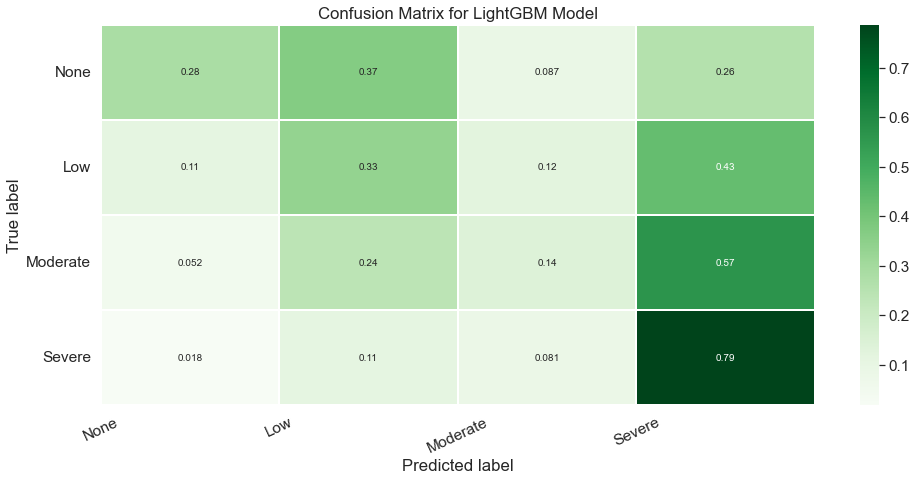

In [34]:
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['None', 'Low', 'Moderate', 
               'Severe']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for LightGBM Model')
plt.show()

## CATBoost Classifier

In [35]:
from catboost import CatBoostClassifier
clf = CatBoostClassifier(n_estimators = 100, silent=True)
clf.fit(X_train,y_train)                   # training classifier

y_pred=clf.predict(X_test)                  # testing classifier 

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4507332722273144


### 5-fold cross validation

In [36]:
cross_val = cross_val_score(clf, X, y, cv=5)
print("%0.4f accuracy with a standard deviation of %0.4f" % (cross_val.mean(), cross_val.std()))

0.4536 accuracy with a standard deviation of 0.0078


### Classification report

In [37]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.40      0.27      0.32       572
           1       0.32      0.29      0.31      1007
           2       0.30      0.18      0.23      1029
           3       0.55      0.76      0.63      1756

    accuracy                           0.45      4364
   macro avg       0.39      0.38      0.37      4364
weighted avg       0.42      0.45      0.42      4364



### Balanced accuracy

In [38]:
balanced_accuracy_score(y_test, y_pred)

0.37576004199836865

### G-mean

In [39]:
geometric_mean_score(y_test, y_pred)

C:\Users\amona\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.3234675977876567

### Confusion matrix

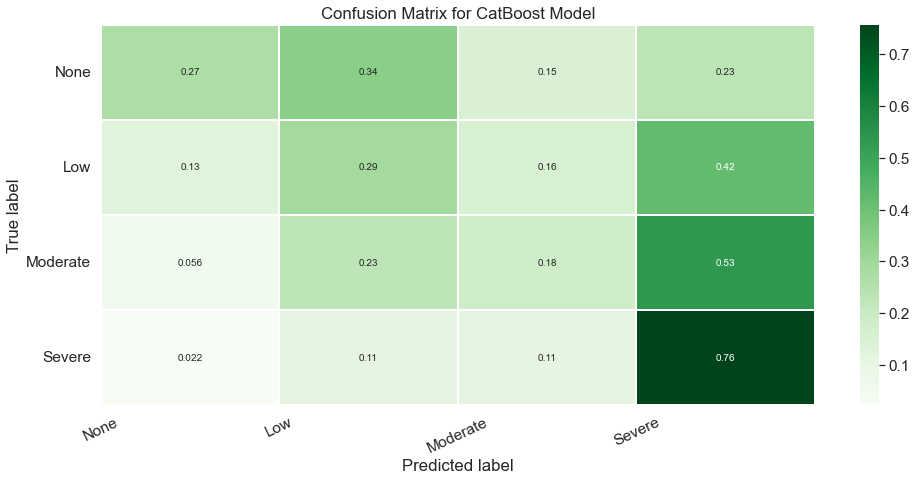

In [40]:
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['None', 'Low', 'Moderate', 
               'Severe']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for CatBoost Model')
plt.show()

## AdaBoost Classifier

In [41]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100)
clf.fit(X_train,y_train)                   # training classifier

y_pred=clf.predict(X_test)                  # testing classifier 

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.46173235563703025


### 5-fold cross validation

In [42]:
cross_val = cross_val_score(clf, X, y, cv=5)
print("%0.4f accuracy with a standard deviation of %0.4f" % (cross_val.mean(), cross_val.std()))

0.4607 accuracy with a standard deviation of 0.0087


### Classification report

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.44      0.23      0.30       572
           1       0.33      0.38      0.35      1007
           2       0.32      0.09      0.14      1029
           3       0.54      0.80      0.65      1756

    accuracy                           0.46      4364
   macro avg       0.41      0.38      0.36      4364
weighted avg       0.43      0.46      0.41      4364



### Balanced accuracy

In [44]:
balanced_accuracy_score(y_test, y_pred)

0.37610294559716745

### G-mean

In [45]:
geometric_mean_score(y_test, y_pred)

0.28346232418804607

### Confusion Matrix

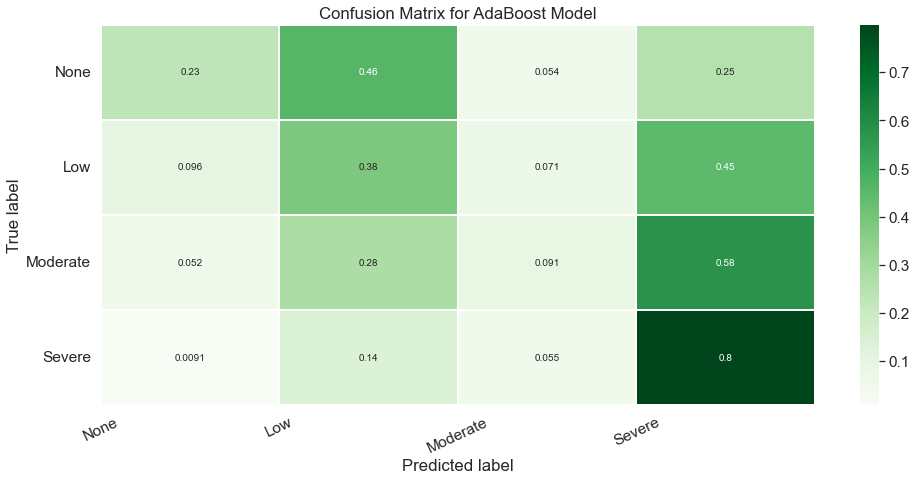

In [46]:
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['None', 'Low', 'Moderate', 
               'Severe']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for AdaBoost Model')
plt.show()